In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly import figure_factory as FF
import chart_studio
chart_studio.tools.set_credentials_file(username='shami_rmit', api_key='B3hxf6DD3iHY0bXH4TT0')

In [2]:
#Read the file
xlsx = pd.ExcelFile('Dataset.xlsx')

#read the data from local directory
data = pd.read_excel(xlsx, 'Dataset')
Originaldataset=data

#view data sample
data.head()

,Student.ID,Teacher.ID,College.Name,School.Name,Student.Message.Time,Teacher.Response.Time
0,*655EE4254CD6751292CEB436540F99EEDD7CF3C3,*1C06EF8D2A0EA85EE88F9A2CD2185BF0A0E85A9E,NaN,NaN,2018-12-26 13:42:58,2019-01-02 08:06:11
1,*A852E7F5D89AA564AF4DA87FE95D9947A3967CEC,*1267BF7A2516009C89642925A67CCA0EE89777A0,C-BUS,Business IT & Logistics,2019-01-01 10:05:35,2019-01-01 11:07:08
2,*D02DA5003C7D760F169B58CDF9B94956C6317FCE,*1267BF7A2516009C89642925A67CCA0EE89777A0,C-BUS,Business IT & Logistics,2019-01-01 10:07:16,2019-01-01 11:10:31
3,*A4A1C43AC047FD6DE7833944F43ABDF9C9D2AAC2,*1267BF7A2516009C89642925A67CCA0EE89777A0,C-BUS,Business IT & Logistics,2019-01-01 23:43:32,2019-01-02 00:48:09
4,*E7050ECAA958D2CD2763EE483E16FD9140D49E97,*BD13E5C24441890B281DB9F75A747D9673210ACD,C-BUS,Management,2019-01-02 03:41:35,2019-01-03 01:16:52


In [3]:
#extracting information related to College of Business

#extracting data related to college of Business
data = data[data['College.Name']=='C-BUS']

#Extracting data by specified date range and save it in two files

dataspan2=data[(data['Student.Message.Time'] >= '2019-07-22') &
          (data['Student.Message.Time'] <= '2019-10-13')]

In [4]:
#extracting information related to College of Business

#extracting data related to college of Business
data = data[data['College.Name']=='C-BUS']

#Extracting data by specified date range and save it in two files

#The first span was not 12 weeks,sochanged the question to 12 weeks starting from March 04
#for two sample t test

dataspan1=data[(data['Student.Message.Time'] >= '2019-03-04') &
          (data['Student.Message.Time'] <= '2019-05-27')]

dataspan2=data[(data['Student.Message.Time'] >= '2019-07-22') &
          (data['Student.Message.Time'] <= '2019-10-13')]

#Below is the original time span given in the question
dataspan3=data[(data['Student.Message.Time'] >= '2019-03-06') &
          (data['Student.Message.Time'] <= '2019-06-23')]

In [5]:
#check the datatypes
data.dtypes

Student.ID                       object
Teacher.ID                       object
College.Name                     object
School.Name                      object
Student.Message.Time     datetime64[ns]
Teacher.Response.Time    datetime64[ns]
dtype: object

In [6]:
#create the column Timeliness to the original data set 1
dataspan1['Timeliness']=dataspan1['Teacher.Response.Time']-dataspan1['Student.Message.Time']

#create the column Timeliness to the original data set 2
dataspan2['Timeliness']=dataspan2['Teacher.Response.Time']-dataspan2['Student.Message.Time']

#create the column Timeliness to the original data set 2
dataspan3['Timeliness']=dataspan3['Teacher.Response.Time']-dataspan3['Student.Message.Time']



In [7]:
#check the shape
print(dataspan1.shape)
print(dataspan2.shape)


(7237, 7)
(7321, 7)


In [8]:
#Convertthe timeliness column into second for better data exploration 
dataspan1['Timeliness_second']=dataspan1['Timeliness'].astype('timedelta64[s]')
dataspan2['Timeliness_second']=dataspan2['Timeliness'].astype('timedelta64[s]')
dataspan3['Timeliness_second']=dataspan3['Timeliness'].astype('timedelta64[s]')


In [9]:
#Take weekly mean of timeliness across dataset1 and dataset 2 -week end with sunday
df1 = dataspan1.set_index('Student.Message.Time').resample('W').Timeliness_second.mean()
df2 = dataspan2.set_index('Student.Message.Time').resample('W').Timeliness_second.mean()
df3 = dataspan3.set_index('Student.Message.Time').resample('W').Timeliness_second.mean()

In [10]:
print(df1.shape)
print(df2.shape)

print(df3.shape)
#fIRST LIFE SPAN IS NOT 12 WEEKS AS PER THE QUESTION, ITS 16 WEEKS

(12,)
(12,)
(16,)


In [11]:
#dispaly  datast 1
df1

Student.Message.Time
2019-03-10    127972.271984
2019-03-17     93998.606529
2019-03-24     85454.011725
2019-03-31     83734.691718
2019-04-07     96170.040293
2019-04-14     70993.127907
2019-04-21    128405.036269
2019-04-28    124106.616842
2019-05-05     88100.828990
2019-05-12     86154.956848
2019-05-19     80836.501946
2019-05-26    103254.027915
Freq: W-SUN, Name: Timeliness_second, dtype: float64

In [12]:
#dispaly  datast 2
df2

Student.Message.Time
2019-07-28    141607.553806
2019-08-04     88375.519916
2019-08-11     82349.240250
2019-08-18     81824.985430
2019-08-25     83993.589365
2019-09-01     95419.292244
2019-09-08     80418.936731
2019-09-15     69027.355281
2019-09-22     64916.093421
2019-09-29     64654.708987
2019-10-06     44028.337500
2019-10-13     25998.267658
Freq: W-SUN, Name: Timeliness_second, dtype: float64

In [13]:
#dispaly  datast 2
df3

Student.Message.Time
2019-03-10    161637.762346
2019-03-17     93998.606529
2019-03-24     85454.011725
2019-03-31     83734.691718
2019-04-07     96170.040293
2019-04-14     70993.127907
2019-04-21    128405.036269
2019-04-28    124106.616842
2019-05-05     88100.828990
2019-05-12     86154.956848
2019-05-19     80836.501946
2019-05-26    103254.027915
2019-06-02     82404.063248
2019-06-09     75364.910959
2019-06-16     93435.355932
2019-06-23     82848.070423
Freq: W-SUN, Name: Timeliness_second, dtype: float64

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



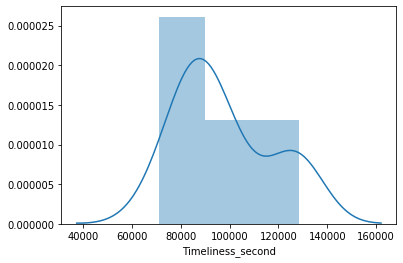

In [14]:
#density plot of df1
sns.distplot(df1)

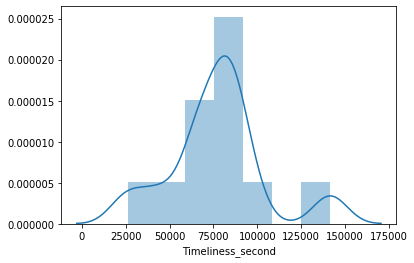

In [15]:
#density plot of df1
sns.distplot(df2)

In [16]:
stats.levene(df1,df2)

LeveneResult(statistic=0.2830936752616008, pvalue=0.600013266608576)

In [17]:
stats.ttest_ind(df1,df2)

Ttest_indResult(statistic=2.0723791675547085, pvalue=0.05015139306935623)

In [18]:
#!pip install chart-studio

In [19]:
twosample_results = scipy.stats.ttest_ind(df1, df2)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

In [20]:
#Two sample independant t test using scipy statas module
from scipy.stats import ttest_ind
import numpy as np
week1_mean = np.mean(df1)
week2_mean = np.mean(df2)
print("week1 mean value:",week1_mean)
print("week2 mean value:",week2_mean)
week1_std = np.std(df1)
week2_std = np.std(df2)
print("week1 std value:",week1_std)
print("week2 std value:",week2_std)
ttest,pval = ttest_ind(df1,df2)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

week1 mean value: 97431.72658049034
week2 mean value: 76884.49004909361
week1 std value: 18642.70308235719
week2 std value: 27088.49733842235
p-value 0.05015139306935623
we accept null hypothesis


In [21]:
#!pip install researchpy

#convert into dataframe
df1=pd.DataFrame(df1)
df2=pd.DataFrame(df2)

#remove index
df1.reset_index()
df2.reset_index()

,Student.Message.Time,Timeliness_second
0,2019-07-28,141607.553806
1,2019-08-04,88375.519916
2,2019-08-11,82349.240250
3,2019-08-18,81824.985430
4,2019-08-25,83993.589365
5,2019-09-01,95419.292244
6,2019-09-08,80418.936731
7,2019-09-15,69027.355281
8,2019-09-22,64916.093421
9,2019-09-29,64654.708987


In [22]:
#Homogeneity of variances
stats.levene(df1['Timeliness_second'],df2['Timeliness_second'])

#The test is not significant meaning there is homogeneity of variances and we can proceed.

LeveneResult(statistic=0.2830936752616008, pvalue=0.600013266608576)

In [23]:
#perform two sample t test
import researchpy as rp
descriptives, results = rp.ttest(df1['Timeliness_second'], df2['Timeliness_second'])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Timeliness_second,12.0,97431.726580,19471.668320,5620.986473,85060.018769,109803.434392
1,Timeliness_second,12.0,76884.490049,28293.012720,8167.489255,58907.967403,94861.012695
2,combined,24.0,87158.108315,25967.520156,5300.597856,76192.986221,98123.230408


In [24]:
#result of Two sample t test
results

,Independent t-test,results
0,Difference (Timeliness_second - Timeliness_sec...,20547.2365
1,Degrees of freedom =,22.0000
2,t =,2.0724
3,Two side test p value =,0.0502
4,Difference > 0 p value =,0.9749
5,Difference < 0 p value =,0.0251
6,Cohen's d =,0.8460
7,Hedge's g =,0.8169
8,Glass's delta =,1.0552
9,r =,0.4041
